In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [144]:
pd.set_option('display.max_columns', 80)

In [145]:
Xente_train = pd.read_csv('wine data/training.csv')
Xente_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [146]:
#checking for random samples of the data
Xente_train.sample(50)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
15573,TransactionId_27330,BatchId_24834,AccountId_4249,SubscriptionId_4429,CustomerId_7343,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-20000.0,20000,2018-12-04T16:03:08Z,4,0
2192,TransactionId_58624,BatchId_84709,AccountId_2019,SubscriptionId_4822,CustomerId_2420,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,500.0,500,2018-11-17T03:42:29Z,2,0
91830,TransactionId_8121,BatchId_31973,AccountId_3329,SubscriptionId_3110,CustomerId_3760,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2019-02-09T16:27:31Z,2,0
89735,TransactionId_120902,BatchId_68286,AccountId_4841,SubscriptionId_3829,CustomerId_3797,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-75.0,75,2019-02-08T11:49:35Z,2,0
46717,TransactionId_19283,BatchId_60926,AccountId_3649,SubscriptionId_549,CustomerId_4089,UGX,256,ProviderId_5,ProductId_11,data_bundles,ChannelId_3,500.0,500,2018-12-30T08:42:21Z,4,0
11657,TransactionId_27582,BatchId_69104,AccountId_354,SubscriptionId_1528,CustomerId_684,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,10000.0,10000,2018-11-30T13:11:10Z,4,0
75479,TransactionId_117611,BatchId_51390,AccountId_4181,SubscriptionId_4068,CustomerId_4633,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,3500.0,3500,2019-01-27T20:50:28Z,2,0
56562,TransactionId_11146,BatchId_76389,AccountId_4841,SubscriptionId_3829,CustomerId_3088,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2019-01-11T07:44:57Z,2,0
95214,TransactionId_83538,BatchId_14711,AccountId_4841,SubscriptionId_3829,CustomerId_3208,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-12T19:37:50Z,2,0
25410,TransactionId_113549,BatchId_89843,AccountId_3124,SubscriptionId_901,CustomerId_3551,UGX,256,ProviderId_6,ProductId_21,utility_bill,ChannelId_3,5000.0,5750,2018-12-13T18:13:21Z,2,0


In [147]:
#checking the unique values for the fraud result column to be sure there is 1.
Xente_train.FraudResult.unique()

array([0, 1], dtype=int64)

In [148]:
#checking for missing values

Xente_train.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [149]:
#checking info of the data

Xente_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [150]:
#checking the number of unique values of all columns to better understand the data
#TransactionId

len(Xente_train.TransactionId.unique())

95662

In [151]:
#BatchId
#This is the unique number assigned to a batch of transactions for processing.
#We might not need to use this as part of our features since it only puts the transactions into batches so that the system can process it.

print('There are {} unique batch values \n'.format(len(Xente_train.BatchId.unique())))

print('They are: ',Xente_train.BatchId.unique())

Xente_train.BatchId.value_counts()

There are 94809 unique batch values 

They are:  ['BatchId_36123' 'BatchId_15642' 'BatchId_53941' ... 'BatchId_118602'
 'BatchId_70924' 'BatchId_29317']


BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_23939      1
BatchId_104215     1
BatchId_116411     1
BatchId_36631      1
BatchId_29317      1
Name: BatchId, Length: 94809, dtype: int64

In [152]:
#AccountId
#This is the unique number identifying the customer on the platform. This value goes to show that a large number
#of the same set of customers kept using the platform. Therefore, there will be a large number of subscription

print('There are {} unique Account ID values \n'.format(len(Xente_train.AccountId.unique())))


There are 3633 unique Account ID values 



In [153]:
#SubscriptionId
#This is the unique number identifying the unique customer subscription
#As expected from the previous column, there are large number of customers subscribed to the platform

print('There are {} unique subscription ID values \n'.format(len(Xente_train.SubscriptionId.unique())))

There are 3627 unique subscription ID values 



In [154]:
#CustomerId
#This is the unique identifier attached to account. I suspect we should have the same number of customerId as AccountId
#And if it is not(as we have here), then maybe there are some accounts whose customers are not on the platform

print('There are {} unique Customer ID values \n'.format(len(Xente_train.CustomerId.unique())))

There are 3742 unique Customer ID values 



In [155]:
#Currency Code

print('We only have {} currency code and it is {} \n'.format(len(Xente_train.CurrencyCode.unique()),Xente_train.CurrencyCode.unique()[0]))

We only have 1 currency code and it is UGX 



In [156]:
#Country Code
#This is the numerical geographical code of country

print('We only have {} country code and it is {} \n'.format(len(Xente_train.CountryCode.unique()),Xente_train.CountryCode.unique()[0]))

Xente_train.CountryCode.unique()

We only have 1 country code and it is 256 



array([256], dtype=int64)

In [157]:
#ProviderId
#This is the source provider of item bought

print('There are {} ProviderId and they are {} \n'.format(len(Xente_train.ProviderId.unique()),Xente_train.ProviderId.unique()))




There are 6 ProviderId and they are ['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2'] 



In [158]:
#ProductId
#This is the item name being bought

print('There are {} Products \n'.format(len(Xente_train.ProductId.unique())))

print('They include {} \n'.format(Xente_train.ProductId.unique()))

There are 23 Products 

They include ['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23'] 



In [159]:
#Product Categories
#This is the productIds organised into bigger categories

print('There are {} Product Categories and they are {} \n'.format(len(Xente_train.ProductCategory.unique()),Xente_train.ProductCategory.unique()))



There are 9 Product Categories and they are ['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other'] 



In [160]:
#ChannelId
#This identifies which channel the customer used. From the description, we should have 5 channels but we only have 4
#which suggests that no customer used ChannleId_4

Xente_train.ChannelId.unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5'],
      dtype=object)

In [161]:
#Amount and Value
#This is the value and absolute value of the transaction respectively.
#Positive for debits from customer account and negative for credit into customer account.


len(Xente_train.Amount.unique())

print('There are {} unique values in the Amount column and there are {} unique values in the Value column\n'.format(len(Xente_train.Amount.unique()),len(Xente_train.Value.unique())))


There are 1676 unique values in the Amount column and there are 1517 unique values in the Value column



In [162]:
#Transaction Start Time
#This shows the date represented in string format. We need to convert it to datetime

Xente_train['TransactionStartTime'] = pd.to_datetime(Xente_train['TransactionStartTime'])
format= '%Y-%m-%dT%H:%M:%SZ'

Xente_train.TransactionStartTime.dtype

#Now, we need to extract the year, month, day, hour, time and second



datetime64[ns, UTC]

In [163]:
#Extracting the above and adding it to the train dataset
Xente_train['TransactionYear'] = Xente_train['TransactionStartTime'].dt.year
Xente_train['TransactionMonth'] = Xente_train['TransactionStartTime'].dt.month
Xente_train['TransactionDay'] = Xente_train['TransactionStartTime'].dt.day
Xente_train['TransactionHour'] = Xente_train['TransactionStartTime'].dt.hour
Xente_train['TransactionMinute'] = Xente_train['TransactionStartTime'].dt.minute
Xente_train['TransactionSecond'] = Xente_train['TransactionStartTime'].dt.second
Xente_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018,11,15,2,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018,11,15,2,19,8
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018,11,15,2,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,2018,11,15,3,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018,11,15,3,34,21


In [282]:
#PricingStrategy
#This is the category of Xente's pricing structure for merchant

Xente_train.PricingStrategy.unique()

array([2, 4, 1, 0], dtype=int64)

In [165]:
#checking the fraud status column

Xente_train.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [166]:
Xente_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018,11,15,2,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018,11,15,2,19,8
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018,11,15,2,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,2018,11,15,3,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018,11,15,3,34,21


In [167]:
#Let's do some EDA to get an idea of how our data is distributed


<AxesSubplot:xlabel='FraudResult', ylabel='count'>

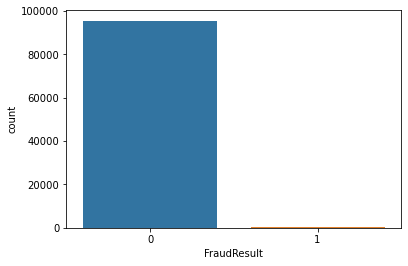

In [168]:
sns.countplot(x='FraudResult', data=Xente_train)

<AxesSubplot:xlabel='FraudResult', ylabel='count'>

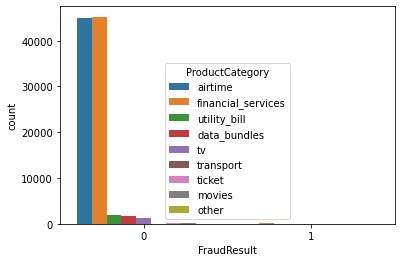

In [169]:
sns.countplot(x='FraudResult', hue='ProductCategory',data=Xente_train)

In [170]:
#We have to convert the ID Columns to float/integer but first, we have to extract the undesired string from it.
Xente_train['BatchId'] = Xente_train['BatchId'].str.replace('BatchId_', '')
Xente_train['TransactionId'] = Xente_train['TransactionId'].str.replace('TransactionId_', '')
Xente_train['AccountId'] = Xente_train['AccountId'].str.replace('AccountId_', '')
Xente_train['SubscriptionId'] = Xente_train['SubscriptionId'].str.replace('SubscriptionId_', '')
Xente_train['CustomerId'] = Xente_train['CustomerId'].str.replace('CustomerId_', '')
Xente_train['ProviderId'] = Xente_train['ProviderId'].str.replace('ProviderId_', '')
Xente_train['ProductId'] = Xente_train['ProductId'].str.replace('ProductId_', '')
Xente_train['ChannelId'] = Xente_train['ChannelId'].str.replace('ChannelId_', '')

In [171]:
#Now we can convert the columns to integer type
Xente_train = Xente_train.astype({"BatchId":'int',"TransactionId":'int',"AccountId":'int',"SubscriptionId":'int',"CustomerId":'int',"ProviderId":'int',"ProductId":'int',"ChannelId":'int'})


In [289]:
#More EDA
Xente_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionId      95662 non-null  int32  
 1   BatchId            95662 non-null  int32  
 2   AccountId          95662 non-null  int32  
 3   SubscriptionId     95662 non-null  int32  
 4   CustomerId         95662 non-null  int32  
 5   CurrencyCode       95662 non-null  object 
 6   CountryCode        95662 non-null  int64  
 7   ProviderId         95662 non-null  int32  
 8   ProductId          95662 non-null  int32  
 9   ProductCategory    95662 non-null  object 
 10  ChannelId          95662 non-null  int32  
 11  Amount             95662 non-null  float64
 12  Value              95662 non-null  int64  
 13  PricingStrategy    95662 non-null  int64  
 14  FraudResult        95662 non-null  int64  
 15  TransactionYear    95662 non-null  int64  
 16  TransactionMonth   956

C:\Users\us3er\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ProductId'>

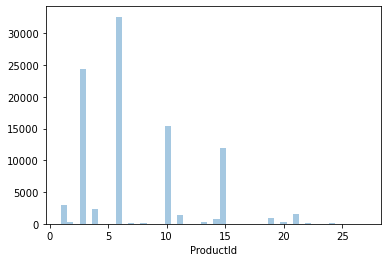

In [173]:
sns.distplot(Xente_train['ProductId'],kde=False)

<AxesSubplot:xlabel='ChannelId'>

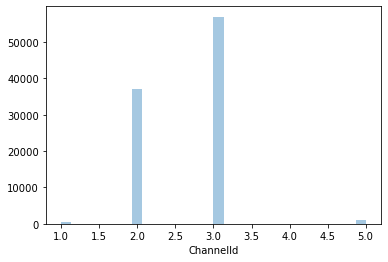

In [174]:
sns.distplot(Xente_train['ChannelId'],kde=False,bins=30)

<AxesSubplot:xlabel='ProviderId'>

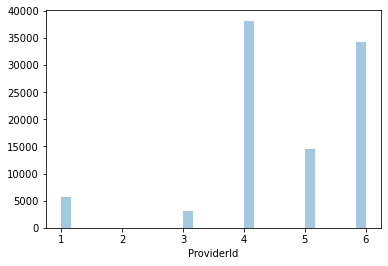

In [175]:
sns.distplot(Xente_train['ProviderId'],kde=False,bins=30)

<AxesSubplot:xlabel='Amount'>

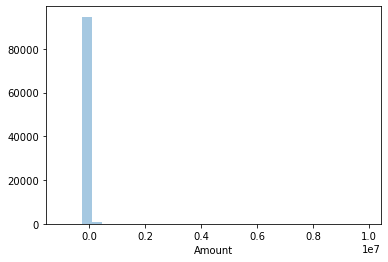

In [176]:
sns.distplot(Xente_train['Amount'],kde=False,bins=30)

In [177]:
#From brief EDA, I can see that the data is not normally distributed so I will use MinMax Scaler preferably.

In [178]:
Xente_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018,11,15,2,18,49
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018,11,15,2,19,8
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018,11,15,2,44,21
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,2018,11,15,3,32,55
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018,11,15,3,34,21


In [189]:
#Dropping the TransactionStartTime column since I have extracted the values I need into the dataframe
Xente_train.drop(['TransactionStartTime'],inplace=True,axis=1)
Xente_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2,0,2018,11,15,2,18,49
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2,0,2018,11,15,2,19,8
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2,0,2018,11,15,2,44,21
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2,0,2018,11,15,3,32,55
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2,0,2018,11,15,3,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,UGX,256,4,6,financial_services,2,-1000.0,1000,2,0,2019,2,13,9,54,9
95658,91597,3503,3439,2643,3874,UGX,256,6,10,airtime,3,1000.0,1000,2,0,2019,2,13,9,54,25
95659,82501,118602,4841,3829,3874,UGX,256,4,6,financial_services,2,-20.0,20,2,0,2019,2,13,9,54,35
95660,136354,70924,1346,652,1709,UGX,256,6,19,tv,3,3000.0,3000,2,0,2019,2,13,10,1,10


In [190]:
#Selecting my features
#Ill be dropping the CurrencyCode and CountryCode columns since it is just one currency and country code
#I'll be dropping the ProductCategory column since it is only a bigger category of the ProductId column
#I'll be dropping the FraudResult column since that is my target
#I'll be droppin the Value column since it is an absolute value of the amount
#Then I'll do feature scaling for all the columns

In [191]:
#selecting my features
X = Xente_train.drop(['CurrencyCode','CountryCode','ProductCategory','FraudResult','Value'],axis=1)
y = Xente_train.FraudResult



In [192]:
#splitting the train data into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [222]:
y_test

69075    0
65709    0
5430     0
82375    0
60896    0
        ..
68006    0
80436    0
82397    0
75187    0
2936     0
Name: FraudResult, Length: 19133, dtype: int64

In [196]:
cols=X_train.columns
cols

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'PricingStrategy',
       'TransactionYear', 'TransactionMonth', 'TransactionDay',
       'TransactionHour', 'TransactionMinute', 'TransactionSecond'],
      dtype='object')

In [311]:
#feature scaling


from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

C:\Users\us3er\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\us3er\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,0.995763,0.823437,1.000000,0.791684,0.645360,0.6,0.192308,0.25,0.083483,0.5,1.0,0.000000,0.633333,0.695652,0.355932,0.084746
1,0.458893,0.282649,0.822314,0.187836,0.592404,0.8,0.076923,0.50,0.083581,1.0,1.0,0.090909,0.166667,0.782609,0.423729,0.864407
2,0.958935,0.011979,0.027686,0.743277,0.060979,1.0,0.769231,0.50,0.084879,0.5,0.0,1.000000,0.833333,0.173913,0.288136,0.237288
3,0.675498,0.954255,0.999793,0.791684,0.077695,0.6,0.192308,0.25,0.083395,0.5,1.0,0.000000,0.366667,0.652174,0.966102,0.661017
4,0.535840,0.054821,1.000000,0.791684,0.444905,0.6,0.192308,0.25,0.083483,0.5,1.0,0.090909,0.166667,0.826087,0.084746,0.254237


In [215]:
#Model training 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

C:\Users\us3er\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0, solver='liblinear')

In [216]:
#Predicting the Fraud Result on the test set
y_predicted = logreg.predict(X_test)

C:\Users\us3er\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [217]:
y_predicted

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [218]:
#Creating the predicted values as a dataframe
y_prediction = pd.DataFrame(y_predicted, columns=['FraudResult Predicted'])
y_prediction

,FraudResult Predicted
0,1
1,0
2,0
3,0
4,1
...,...
19128,0
19129,0
19130,0
19131,0


In [219]:
#Converting the ytest to numpy so I can add to dataframe above
y_true = y_test.to_numpy()

In [224]:
y_prediction['FraudResult True'] = y_true
y_prediction

,FraudResult Predicted,FraudResult True
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
19128,0,0
19129,0,0
19130,0,0
19131,0,0


In [227]:
##Let's evaluate our model using the F1score
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     19098
           1       0.00      1.00      0.01        35

    accuracy                           0.56     19133
   macro avg       0.50      0.78      0.36     19133
weighted avg       1.00      0.56      0.71     19133



In [229]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_true, y_predicted)
cm

array([[10647,  8451],
       [    0,    35]], dtype=int64)

In [230]:
#In the case where you want to minimize the false positives and negatives, then the F1 Score may be a good choice.
#A scenario will be where a false negative is just as bad as a false positive such as this transaction fraud case.


#### Therefore, we have a fair F1 Score for our model but it has to be improved upon. It also goes to show that our model is better in predicting 0(No fraud) than it is at predicting 1(Fraud) which is also not good enough.

#### Importing and Cleaning the Test Data

In [291]:
Xente_test = pd.read_csv('wine data/test.csv')
Xente_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:56:28Z,2
45015,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:57:38Z,1
45016,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:59:17Z,1
45017,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:59:39Z,2


In [292]:
#converting the transactionstarttime column and extracting the year, month,day,hour,minute and second
Xente_test['TransactionStartTime'] = pd.to_datetime(Xente_test['TransactionStartTime'])
format= '%Y-%m-%dT%H:%M:%SZ'
Xente_test['TransactionYear'] = Xente_test['TransactionStartTime'].dt.year
Xente_test['TransactionMonth'] = Xente_test['TransactionStartTime'].dt.month
Xente_test['TransactionDay'] = Xente_test['TransactionStartTime'].dt.day
Xente_test['TransactionHour'] = Xente_test['TransactionStartTime'].dt.hour
Xente_test['TransactionMinute'] = Xente_test['TransactionStartTime'].dt.minute
Xente_test['TransactionSecond'] = Xente_test['TransactionStartTime'].dt.second
Xente_test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13 10:01:40+00:00,4,2019,2,13,10,1,40
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13 10:02:12+00:00,2,2019,2,13,10,2,12
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 10:02:30+00:00,2,2019,2,13,10,2,30
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13 10:02:38+00:00,4,2019,2,13,10,2,38
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13 10:02:58+00:00,2,2019,2,13,10,2,58


In [294]:
#Extracting undesired string from the ID columns.
Xente_test['BatchId'] = Xente_test['BatchId'].str.replace('BatchId_', '')
Xente_test['TransactionId'] = Xente_test['TransactionId'].str.replace('TransactionId_', '')
Xente_test['AccountId'] = Xente_test['AccountId'].str.replace('AccountId_', '')
Xente_test['SubscriptionId'] = Xente_test['SubscriptionId'].str.replace('SubscriptionId_', '')
Xente_test['CustomerId'] = Xente_test['CustomerId'].str.replace('CustomerId_', '')
Xente_test['ProviderId'] = Xente_test['ProviderId'].str.replace('ProviderId_', '')
Xente_test['ProductId'] = Xente_test['ProductId'].str.replace('ProductId_', '')
Xente_test['ChannelId'] = Xente_test['ChannelId'].str.replace('ChannelId_', '')

In [297]:
#Converting the ID columns to integer type
Xente_test = Xente_test.astype({"BatchId":'int',"TransactionId":'int',"AccountId":'int',"SubscriptionId":'int',"CustomerId":'int',"ProviderId":'int',"ProductId":'int',"ChannelId":'int'})


In [300]:
#Dropping the TransactionStartTime column since I have extracted the values I need into the dataframe
Xente_test.drop(['TransactionStartTime'],inplace=True,axis=1)

In [301]:
#Selecting my features
#Ill be dropping the CurrencyCode and CountryCode columns since it is just one currency and country code
#I'll be dropping the ProductCategory column since it is only a bigger category of the ProductId column
#I'll be droppin the Value column since it is an absolute value of the amount
#Then I'll do feature scaling for all the columns
X_test2 = Xente_test.drop(['CurrencyCode','CountryCode','ProductCategory','Value'],axis=1)
cols1 = X_test2.columns
X_test2

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,50600,35028,2441,4426,2857,5,3,3,1000.0,4,2019,2,13,10,1,40
1,95109,45139,3439,2643,3874,5,15,3,2000.0,2,2019,2,13,10,2,12
2,47357,74887,4841,3829,2857,4,6,2,-50.0,2,2019,2,13,10,2,30
3,28185,11025,2685,4626,3105,5,10,3,3000.0,4,2019,2,13,10,2,38
4,22140,29804,4841,3829,3105,4,6,2,-60.0,2,2019,2,13,10,2,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,4,6,3,-5000.0,2,2019,3,14,23,56,28
45015,24829,53630,4803,1738,5272,3,10,3,10000.0,1,2019,3,14,23,57,38
45016,102920,112209,4817,4613,5286,3,10,3,10000.0,1,2019,3,14,23,59,17
45017,128439,58734,4841,3829,5286,4,6,3,-5000.0,2,2019,3,14,23,59,39


In [302]:
#feature scaling


from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_test2 = scaler.fit_transform(X_test2)
X_test2 = pd.DataFrame(X_test2, columns=[cols1])
X_test2

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond
0,0.359650,0.251106,0.503208,0.915202,0.382214,0.8,0.076923,0.50,0.208417,1.00,0.0,0.0,0.444444,0.434783,0.016949,0.677966
1,0.676050,0.323591,0.709791,0.546432,0.519037,0.8,0.538462,0.50,0.208500,0.50,0.0,0.0,0.444444,0.434783,0.033898,0.203390
2,0.336596,0.536852,1.000000,0.791727,0.382214,0.6,0.192308,0.25,0.208329,0.50,0.0,0.0,0.444444,0.434783,0.033898,0.508475
3,0.200309,0.079030,0.553716,0.956567,0.415579,0.8,0.346154,0.50,0.208583,1.00,0.0,0.0,0.444444,0.434783,0.033898,0.644068
4,0.157337,0.213655,1.000000,0.791727,0.415579,0.6,0.192308,0.25,0.208328,0.50,0.0,0.0,0.444444,0.434783,0.033898,0.983051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,0.825965,0.841251,1.000000,0.791727,0.700794,0.6,0.192308,0.50,0.207917,0.50,0.0,1.0,0.481481,1.000000,0.949153,0.474576
45015,0.176452,0.384462,0.992134,0.359255,0.707117,0.4,0.346154,0.50,0.209167,0.25,0.0,1.0,0.481481,1.000000,0.966102,0.644068
45016,0.731576,0.804410,0.995032,0.953878,0.709000,0.4,0.346154,0.50,0.209167,0.25,0.0,1.0,0.481481,1.000000,1.000000,0.288136
45017,0.912983,0.421052,1.000000,0.791727,0.709000,0.6,0.192308,0.50,0.207917,0.50,0.0,1.0,0.481481,1.000000,1.000000,0.661017


In [303]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (TransactionId,)      45019 non-null  float64
 1   (BatchId,)            45019 non-null  float64
 2   (AccountId,)          45019 non-null  float64
 3   (SubscriptionId,)     45019 non-null  float64
 4   (CustomerId,)         45019 non-null  float64
 5   (ProviderId,)         45019 non-null  float64
 6   (ProductId,)          45019 non-null  float64
 7   (ChannelId,)          45019 non-null  float64
 8   (Amount,)             45019 non-null  float64
 9   (PricingStrategy,)    45019 non-null  float64
 10  (TransactionYear,)    45019 non-null  float64
 11  (TransactionMonth,)   45019 non-null  float64
 12  (TransactionDay,)     45019 non-null  float64
 13  (TransactionHour,)    45019 non-null  float64
 14  (TransactionMinute,)  45019 non-null  float64
 15  (TransactionSecond,

In [304]:
y_pred_test = logreg.predict(X_test2)

C:\Users\us3er\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [317]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [318]:
y_pred =  pd.DataFrame(y_pred_test, columns=['FraudResult Predicted'])
y_pred

,FraudResult Predicted
0,0
1,0
2,0
3,0
4,0
...,...
45014,0
45015,0
45016,0
45017,0


In [323]:
#adding the predicted fraud result to the dataframe
X_test2['FraudResult'] = y_pred_test
X_test2

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSecond,FraudResult
0,0.359650,0.251106,0.503208,0.915202,0.382214,0.8,0.076923,0.50,0.208417,1.00,0.0,0.0,0.444444,0.434783,0.016949,0.677966,0
1,0.676050,0.323591,0.709791,0.546432,0.519037,0.8,0.538462,0.50,0.208500,0.50,0.0,0.0,0.444444,0.434783,0.033898,0.203390,0
2,0.336596,0.536852,1.000000,0.791727,0.382214,0.6,0.192308,0.25,0.208329,0.50,0.0,0.0,0.444444,0.434783,0.033898,0.508475,0
3,0.200309,0.079030,0.553716,0.956567,0.415579,0.8,0.346154,0.50,0.208583,1.00,0.0,0.0,0.444444,0.434783,0.033898,0.644068,0
4,0.157337,0.213655,1.000000,0.791727,0.415579,0.6,0.192308,0.25,0.208328,0.50,0.0,0.0,0.444444,0.434783,0.033898,0.983051,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,0.825965,0.841251,1.000000,0.791727,0.700794,0.6,0.192308,0.50,0.207917,0.50,0.0,1.0,0.481481,1.000000,0.949153,0.474576,0
45015,0.176452,0.384462,0.992134,0.359255,0.707117,0.4,0.346154,0.50,0.209167,0.25,0.0,1.0,0.481481,1.000000,0.966102,0.644068,0
45016,0.731576,0.804410,0.995032,0.953878,0.709000,0.4,0.346154,0.50,0.209167,0.25,0.0,1.0,0.481481,1.000000,1.000000,0.288136,0
45017,0.912983,0.421052,1.000000,0.791727,0.709000,0.6,0.192308,0.50,0.207917,0.50,0.0,1.0,0.481481,1.000000,1.000000,0.661017,0


In [321]:
#checking the unique values of the FraudResult Column
y_pred['FraudResult Predicted'].unique()

array([0, 1], dtype=int64)